In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-feb-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-feb-2022/train.csv
/kaggle/input/tabular-playground-series-feb-2022/test.csv


# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Importing data

In [3]:
train = pd.read_csv('../input/tabular-playground-series-feb-2022/train.csv', index_col=0)
test = pd.read_csv('../input/tabular-playground-series-feb-2022/test.csv', index_col=0)
submission = pd.read_csv('../input/tabular-playground-series-feb-2022/sample_submission.csv')

In [4]:
train.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [5]:
train.dtypes

A0T0G0C10    float64
A0T0G1C9     float64
A0T0G2C8     float64
A0T0G3C7     float64
A0T0G4C6     float64
              ...   
A9T0G0C1     float64
A9T0G1C0     float64
A9T1G0C0     float64
A10T0G0C0    float64
target        object
Length: 287, dtype: object

In [6]:
train.describe()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05
mean,6.421457e-07,-0.000003,-0.000014,-0.000010,0.000005,0.000025,0.000014,-0.000009,-0.000028,-0.000008,...,0.000135,0.000348,0.000253,0.000464,0.000581,0.000379,0.000062,8.982134e-05,1.170014e-04,2.215407e-07
std,8.654927e-05,0.000132,0.000287,0.000436,0.000683,0.000869,0.000775,0.000441,0.000107,0.000083,...,0.000711,0.001117,0.000914,0.001238,0.001528,0.001182,0.000466,5.475606e-04,6.788277e-04,2.050081e-05
min,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-9.536743e-06,-9.536743e-06,-9.536743e-07
25%,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-9.536743e-06,-9.536743e-06,-9.536743e-07
50%,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000237,-0.000199,-0.000114,-0.000043,-0.000010,...,0.000014,0.000064,0.000047,0.000124,0.000114,0.000043,-0.000010,4.632568e-07,4.632568e-07,-9.536743e-07
75%,-9.536743e-07,-0.000003,-0.000013,-0.000004,-0.000011,0.000003,-0.000030,0.000004,-0.000028,-0.000010,...,0.000111,0.000463,0.000297,0.000684,0.000774,0.000365,0.000030,6.046326e-05,6.946326e-05,-9.536743e-07
max,9.999046e-03,0.009990,0.009957,0.009886,0.019800,0.019760,0.019800,0.009886,0.009957,0.009990,...,0.019957,0.019914,0.019957,0.019914,0.019914,0.019957,0.009990,9.990463e-03,1.999046e-02,9.990463e-04


In [7]:
train.describe(include='object')

,target
count,200000
unique,10
top,Bacteroides_fragilis
freq,20139


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Columns: 287 entries, A0T0G0C10 to target
dtypes: float64(286), object(1)
memory usage: 439.5+ MB


In [9]:
train.isnull().sum() #check for null data

A0T0G0C10    0
A0T0G1C9     0
A0T0G2C8     0
A0T0G3C7     0
A0T0G4C6     0
            ..
A9T0G0C1     0
A9T0G1C0     0
A9T1G0C0     0
A10T0G0C0    0
target       0
Length: 287, dtype: int64

In [10]:
train.isnull().sum().sum()

0

In [11]:
y = train['target'] 
X = train.drop(columns=['target'])

# Exploring target data

In [12]:
y.value_counts()

Bacteroides_fragilis        20139
Streptococcus_pyogenes      20076
Streptococcus_pneumoniae    20074
Campylobacter_jejuni        20063
Salmonella_enterica         20030
Escherichia_coli            19958
Enterococcus_hirae          19947
Escherichia_fergusonii      19937
Staphylococcus_aureus       19929
Klebsiella_pneumoniae       19847
Name: target, dtype: int64

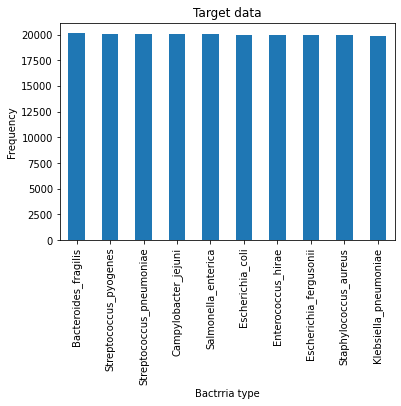

In [13]:
y.value_counts().transpose().plot(kind='bar')
plt.title('Target data')
plt.ylabel('Frequency')
plt.xlabel('Bactrria type')
plt.show()

# Using Model: RandomForestClassifier

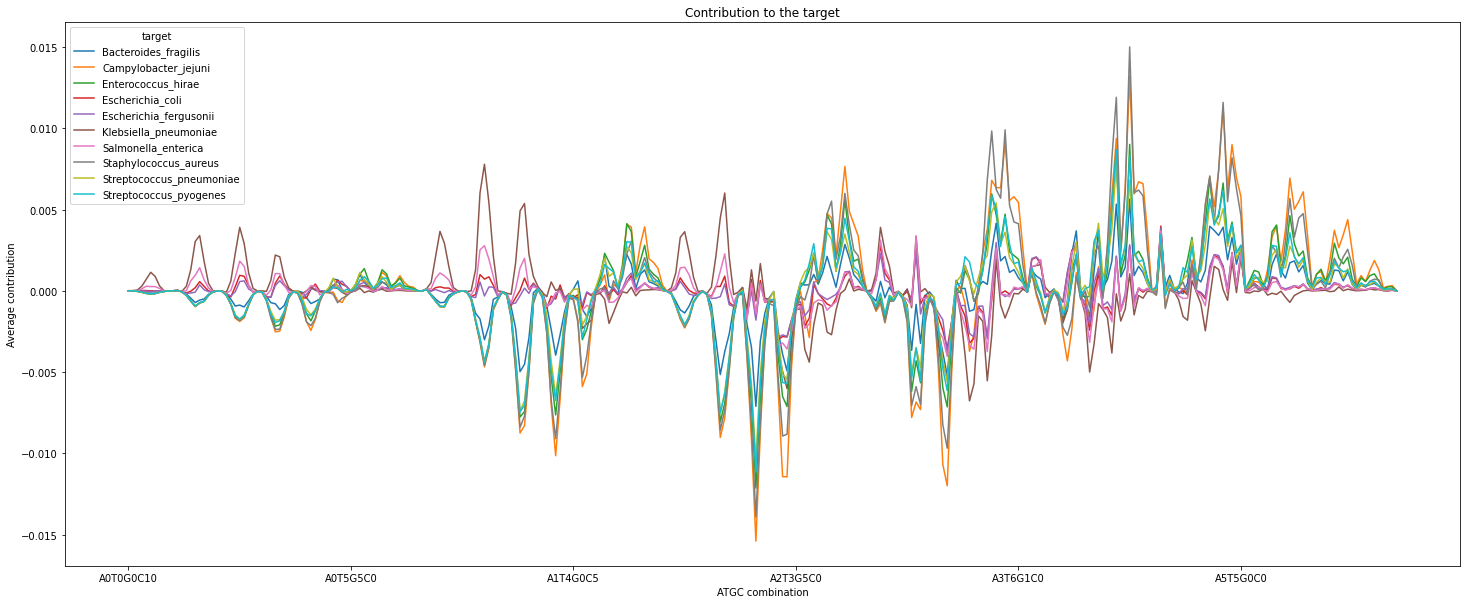

In [14]:
avg = train.groupby(['target']).mean() # getting the average contributuion for each target
# avg.head()
avg.transpose().plot(kind='line',figsize=(25, 10))
plt.title('Contribution to the target')
plt.ylabel('Average contribution')
plt.xlabel('ATGC combination')
plt.show()


In [15]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)

In [16]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(train_X, train_y)

RandomForestClassifier(random_state=1)

In [17]:
rf_val_predictions = rf_model.predict(val_X) # predicting for validation
rf_val_predictions[:25]

array(['Escherichia_fergusonii', 'Staphylococcus_aureus',
       'Streptococcus_pyogenes', 'Escherichia_fergusonii',
       'Klebsiella_pneumoniae', 'Enterococcus_hirae',
       'Bacteroides_fragilis', 'Salmonella_enterica',
       'Campylobacter_jejuni', 'Salmonella_enterica',
       'Staphylococcus_aureus', 'Enterococcus_hirae',
       'Campylobacter_jejuni', 'Salmonella_enterica',
       'Klebsiella_pneumoniae', 'Streptococcus_pyogenes',
       'Streptococcus_pyogenes', 'Salmonella_enterica',
       'Streptococcus_pneumoniae', 'Klebsiella_pneumoniae',
       'Streptococcus_pyogenes', 'Salmonella_enterica',
       'Enterococcus_hirae', 'Klebsiella_pneumoniae',
       'Enterococcus_hirae'], dtype=object)

# Validation

In [18]:
a_s = accuracy_score(val_y, rf_val_predictions)
print('Accuracy score:',a_s)

Accuracy score: 0.99232


# Visualizing accuracy

In [19]:
labl = y.unique().tolist() #List of Names of Bacteria
# using confusion_matrix from sklearn.metrics
cm = confusion_matrix(val_y, rf_val_predictions, labels= labl)
print(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)

[[4934    0   22    0    4   13   17    2    4    0]
 [   1 4966    0   17    0    3    0   15    2   20]
 [   4    4 4975    0    7   12   11    0    1    0]
 [   0   15    4 4873    0    2    0   42    2    5]
 [   5    0    0    0 5015    1   11    0    0    0]
 [   7    0    4    0    6 5022    4    2    5    0]
 [   5    0    4    2   15    3 4942    0    0    0]
 [   4    7    3   14    0    0    2 4961    1    3]
 [   6    0    3   13    1    4    1    8 5011    0]
 [   0    4    0    3    0    2    0    0    2 4917]]


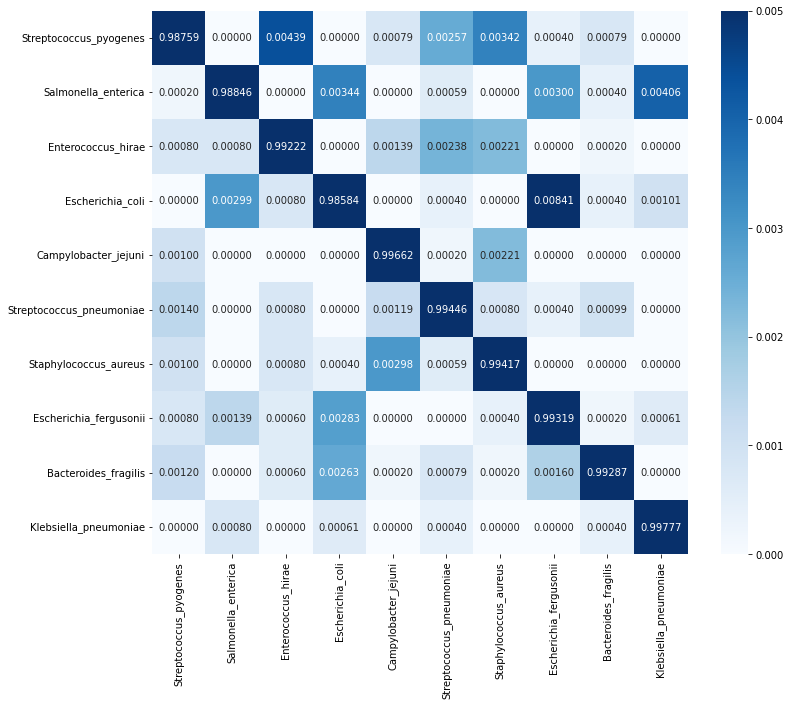

In [20]:
fig, ax = plt.subplots(figsize=(12,10))           
ax = sns.heatmap(cmn, annot=True, fmt='.5f',cmap="Blues",vmin=0.0, vmax=0.005)
ax.set_xticklabels(labl, rotation=90)
ax.set_yticklabels(labl,rotation=0)
plt.show()

# Retrain the model with whole train data set

In [21]:
rf_model.fit(X,y)

RandomForestClassifier(random_state=1)

In [22]:
test.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
row_id,,,,,,,,,,,,,,,,,,,,,
200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,-0.000008,...,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,-0.000010,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,-0.000008,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,-0.000008,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07


In [23]:
rf_val_predictions_test = rf_model.predict(test) #predictions for test data set
rf_val_predictions_test[:25]

array(['Escherichia_fergusonii', 'Salmonella_enterica',
       'Enterococcus_hirae', 'Salmonella_enterica',
       'Staphylococcus_aureus', 'Escherichia_fergusonii',
       'Salmonella_enterica', 'Staphylococcus_aureus',
       'Streptococcus_pneumoniae', 'Klebsiella_pneumoniae',
       'Streptococcus_pneumoniae', 'Bacteroides_fragilis',
       'Klebsiella_pneumoniae', 'Campylobacter_jejuni',
       'Streptococcus_pyogenes', 'Streptococcus_pneumoniae',
       'Campylobacter_jejuni', 'Campylobacter_jejuni', 'Escherichia_coli',
       'Bacteroides_fragilis', 'Campylobacter_jejuni', 'Escherichia_coli',
       'Bacteroides_fragilis', 'Streptococcus_pneumoniae',
       'Streptococcus_pyogenes'], dtype=object)

# Preparing submission

In [24]:
col_nam = test.columns # all column names of test data set
test_pred = test.copy(deep=False) # make a copy of test data set
test_pred['target'] = rf_val_predictions_test # adding new column to test tata set
output= test_pred.drop(columns=col_nam) # droping unnecessary columns
output.reset_index(inplace=True) # rest index
output.head()

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus


# Writing in to a csv file

In [25]:
output.to_csv('submission.csv', index=False)
print("submission was successful")

submission was successful
